In [18]:
import urllib.request
import os.path
import numpy as np
import sys
sys.path.insert(0, './')
from utils import plot_mats

(36, 3, 64, 64)
(36, 3, 64, 64)


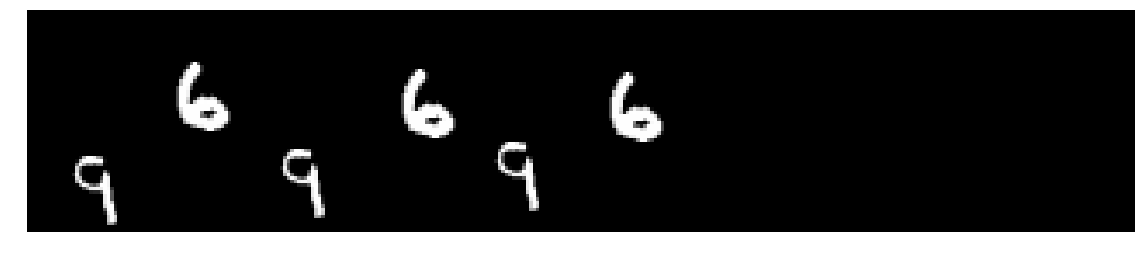

In [67]:
class MMnistFrameSplitter:
    """ splits the moving mnist dataset into shorts of n frames
    
    Moving Mnist: 
        10.000 sequences of length 20 showing 2 digits moving in 64x64
    
    """
    def __init__(self, n=3, ntest=1000, file_name = 'mnist_test_seq.npy', batchsize=2):
        """ ctor
            n: integer, length of subsequence
            ntest: integer, number of items that belong to the test set
            file_name: string, name used to safe the data locally
        """
        
        self.batchsize = batchsize
        self.batch_loop = 0
        self.n = n
        
        if not os.path.isfile(file_name):
            print("could not find moving mnist: download it..")
            url = 'http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy'
            urllib.request.urlretrieve(url, file_name)
            print("download complete")
    
        moving_mnist = np.load(file_name) # shape: 20,10000,64,64
        
        moving_mnist = np.rollaxis(moving_mnist, 1) # --> 10000,20,64,64
        np.random.shuffle(moving_mnist)
        
        self.test_set = moving_mnist[0:ntest]
        self.train_set = moving_mnist[ntest:]
        
        F, N, H, W = moving_mnist.shape # Frames, Numbers, Height, Width
        

    def transform_to_n_gram(self, batch):
        """ transforms the batch into an n-gram (parameter n)
        batch: np.array((batchsize, 20, 64, 64))
        """
        n = self.n
        N, M, H, W = batch.shape
        seqs = M-n+1 # sequences per video
        
        Result = np.zeros((seqs * N, n, 64, 64), 'uint8')
        
        print(Result.shape)
        
        pos = 0
        for j in range(N):
            for i in range(seqs):
                Result[pos] = batch[j, i:i+n]
                pos += 1 
            
        return Result
        
    
    def next_batch(self):
        """ returns the next batch
        """
        start = self.batch_loop
        end = self.batch_loop + self.batchsize
        N = self.train_set.shape[0]
        if N > end:
            self.batch_loop = end
            return self.transform_to_n_gram(
                self.train_set[start:end])
        else:
            diff = (N - start)
            end = self.batchsize - diff
            
            set1 = self.train_set[start:N]
            set2 = self.train_set[0:end]
            
            self.batch_loop = end
            return self.transform_to_n_gram(
                np.concatenate((set1, set2)))
        

splitter = MMnistFrameSplitter()

out = splitter.next_batch()

print(out.shape)

ff = out[0]


plot_mats(ff)

In [76]:
moving_mnist = np.load('mnist_test_seq.npy')
moving_mnist = np.rollaxis(moving_mnist, 1) # --> 10000,20,64,64

def transform_to_n_gram(batch):
        """ transforms the batch into an n-gram (parameter n)
        batch: np.array((batchsize, 20, 64, 64))
        """
        n = 3
        N, M, H, W = batch.shape
        seqs = M-n+1 # sequences per video
        
        Result = np.zeros((seqs * N, n, 64, 64), 'uint8')
        
        pos = 0
        for j in range(N):
            for i in range(seqs):
                Result[pos] = batch[j, i:i+n]
                pos += 1 
        
        N, M, H, W = Result.shape
        
        return Result.reshape((N, M, H * W))

new_set = transform_to_n_gram(moving_mnist)
print(new_set.shape)

#ff = new_set[0]


#plot_mats(ff)

18
(180000, 3, 64, 64)
(180000, 3, 4096)
